<a href="https://colab.research.google.com/github/BrunaAmorimUFPE/Topicos_4/blob/main/Atividade_7_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Introdução


###Rede Neural Artificial (NN)
Também chamada de Multilayer Perceptron (MLP).
Cada neurônio em uma camada está conectado a todos os neurônios da camada seguinte (fully connected).
É eficaz para dados estruturados, como tabelas e conjuntos de números.
Para imagens, os pixels precisam ser achatados em um vetor 1D, perdendo informações espaciais importantes.


###Rede Neural Convolucional (CNN)
Foi projetada para processar dados com estrutura espacial, como imagens.
Utiliza camadas convolucionais para extrair características automaticamente.
As camadas de pooling reduzem a dimensionalidade, tornando o modelo mais eficiente e robusto.
Preserva informações espaciais, identificando padrões como bordas, texturas e formas em diferentes regiões da imagem.
Melhor desempenho para visão computacional, reduzindo o número de parâmetros em comparação com redes totalmente conectadas.

##2. Objetivo

Classificar imagens em escala de cinza de dígitos manuscritos (0-9) do conjunto de dados MNIST. Trata-se de uma coleção de 70.000 imagens em escala de cinza de dígitos manuscritos (0-9). Cada imagem é uma matriz de 28x28 pixels, onde cada pixel representa a intensidade dos valores de cinza (de 0 a 255).

O conjunto de dados MNIST é composto por 60.000 amostras de treinamento e 10.000 amostras de teste. Ele é amplamente utilizado como referência em aprendizado de máquina para tarefas como classificação de imagens.

O objetivo é treinar uma rede neural convolucional (CNN) para prever com precisão o dígito correto de cada imagem com base nos padrões aprendidos durante o treinamento. Trata-se de um problema de aprendizado supervisionado, onde a entrada é a imagem e a saída é o rótulo do dígito.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar os dados para o intervalo [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expandir dimensões para a CNN (adicionar canal de cor)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
# Construir o modelo CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primeira camada convolucional
    keras.layers.MaxPooling2D((2, 2)),  # Primeira camada de pooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda camada convolucional
    keras.layers.MaxPooling2D((2, 2)),  # Segunda camada de pooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Terceira camada convolucional
    keras.layers.Flatten(),  # Achatar a matriz em um vetor
    keras.layers.Dense(64, activation='relu'),  # Camada totalmente conectada
    keras.layers.Dense(10, activation='softmax')  # Camada de saída com 10 classes
])

# Compilar o modelo
model.compile(optimizer='adam',  # Otimizador Adam para ajuste de pesos
              loss='sparse_categorical_crossentropy',  # Função de perda para classificação multiclasse
              metrics=['accuracy'])  # Métrica de acurácia

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.8993 - loss: 0.3325 - val_accuracy: 0.9865 - val_loss: 0.0455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9855 - val_loss: 0.0478
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9890 - val_loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9907 - val_loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0406
Teste - Perda: 0.0334, Acurácia: 0.9907


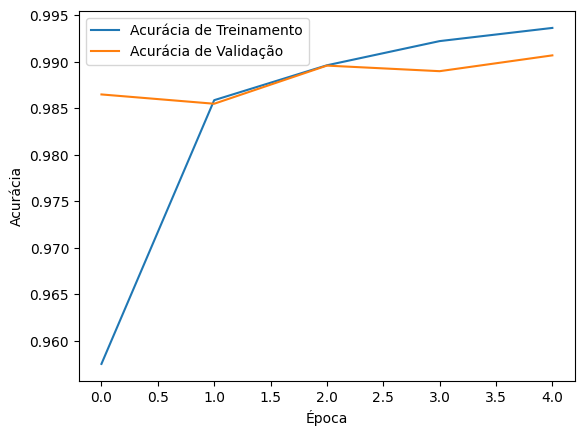

In [5]:
# Treinar o modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))  # Ajuste dos pesos baseado nos dados de treinamento

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)  # Medir a perda e acurácia no conjunto de teste
print(f'Teste - Perda: {loss:.4f}, Acurácia: {accuracy:.4f}')

# Plotar a curva de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')  # Gráfico da acurácia de treinamento
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')  # Gráfico da acurácia de validação
plt.xlabel('Época')  # Rótulo do eixo x
plt.ylabel('Acurácia')  # Rótulo do eixo y
plt.legend()  # Adicionar legenda ao gráfico
plt.show()  # Exibir o gráfico


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


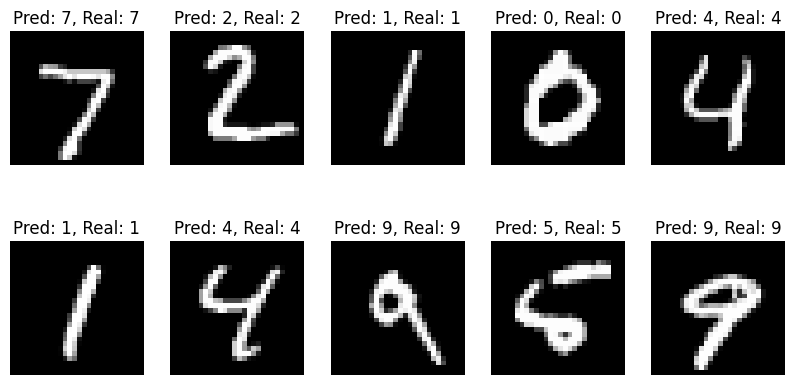

In [6]:
# Fazer previsões sobre o conjunto de teste
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Exibir algumas imagens com previsões
num_images = 10
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}, Real: {y_test[i]}')
    plt.axis('off')
plt.show()